In [1]:
from pprint import pprint
from dataclasses import asdict

from conditional_rate_matching.configs.config_crm import CRMConfig, BasicTrainerConfig, ConstantProcessConfig
from conditional_rate_matching.data.states_dataloaders_config import StatesDataloaderConfig
from conditional_rate_matching.configs.config_files import ExperimentFiles
from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer
from conditional_rate_matching.models.temporal_networks.temporal_networks_config import TemporalDeepMLPConfig
from conditional_rate_matching.data.graph_dataloaders_config import CommunitySmallConfig


def run_experiment(dynamics="crm",
                   experiment_type="graph_test",
                   experiment_indentifier="MLP",
                   full_adjacency=False,
                   device="cpu",
                   epochs=1000,
                   batch_size=32,
                   learning_rate=1e-5, 
                   hidden_dim=16, 
                   num_layers=2,
                   activation="ReLU",
                   time_embed_dim=16,
                   gamma=1.,
                   num_timesteps=100):

    experiment_files = ExperimentFiles(experiment_name=dynamics,
                                       experiment_type=experiment_type,
                                       experiment_indentifier=experiment_indentifier,
                                       delete=True)

    crm_config = CRMConfig()
        
    crm_config.data1 = CommunitySmallConfig(dataset_name="community_small",
                                            batch_size=batch_size,
                                            full_adjacency=full_adjacency,
                                            flatten=False if full_adjacency else True,
                                            as_image=False,
                                            max_training_size=None,
                                            max_test_size=2000)
    
    crm_config.data0 = StatesDataloaderConfig(dataset_name="categorical_dirichlet",
                                                dirichlet_alpha=100.,
                                                batch_size=batch_size,
                                                as_image=False)
    
    crm_config.process = ConstantProcessConfig(gamma=gamma)
    crm_config.temporal_network = TemporalDeepMLPConfig(hidden_dim = hidden_dim,
                                                    time_embed_dim = time_embed_dim,
                                                    num_layers = num_layers,
                                                    activation = activation)

    crm_config.trainer = BasicTrainerConfig(number_of_epochs=epochs,
                                            learning_rate=learning_rate,
                                            device=device,
                                            metrics=["mse_histograms", 
                                                    "binary_paths_histograms", 
                                                    "marginal_binary_histograms", 
                                                    "graphs_plot"])
    
    crm_config.pipeline.number_of_steps = num_timesteps
    crm = CRMTrainer(crm_config, experiment_files)
    print(crm.generative_model)
    _ , metrics = crm.train()
    
    return metrics


/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CRM(config=CRMConfig(data0=StatesDataloaderConfig(name='StatesDataloader', dataset_name='categorical_dirichlet', batch_size=32, data_dir='/home/df630/conditional_rate_matching/data/raw', max_test_size=300, sample_size=1000, dirichlet_alpha=100.0, bernoulli_probability=None, dimensions=400, vocab_size=2, as_image=False, total_data_size=1000, training_size=800, test_size=200, test_split=0.2, temporal_net_expected_shape=[4], data_min_max=[0.0, 1.0]), data1=CommunitySmallConfig(name='GraphDataloader', dataset_name='community_small', batch_size=32, data_dir='/home/df630/conditional_rate_matching/data/raw/graph', max_node_num=20, max_feat_num=10, dimensions=400, vocab_size=2, full_adjacency=True, flatten=False, as_image=False, init='deg', total_data_size=100, training_size=80, test_size=20, test_split=0.2, max_training_size=None, max_test_size=2000, temporal_net_expected_shape=[20, 20], preprocess_datapath='orca_berlin', data_min_max=[0.0, 1.0]), temporal_network=TemporalDeepMLPConfig(name='

Epoch 1000, Loss: 0.6559: 100%|██████████| 1000/1000 [00:23<00:00, 42.62it/s]
100it [00:00, 728.78it/s]
100%|██████████| 10/10 [00:00<00:00, 1401.46it/s]


{'mse_marginal_histograms': 0.04246874898672104}

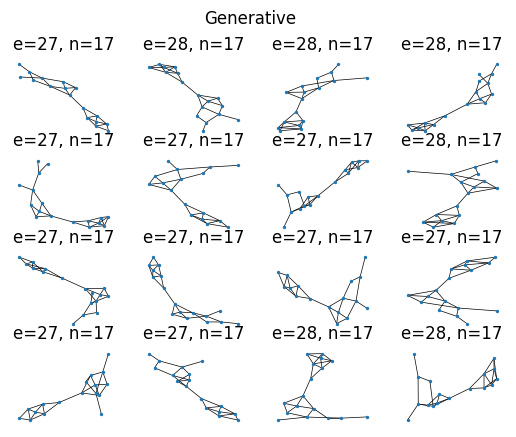

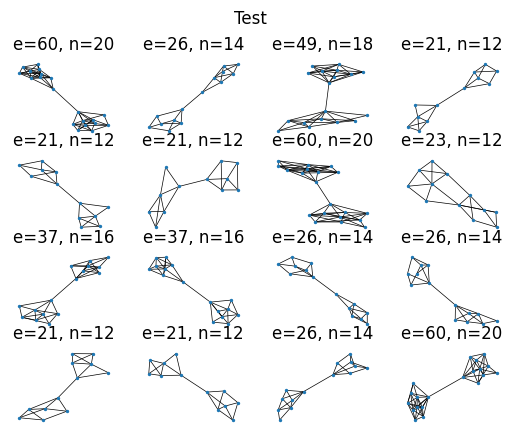

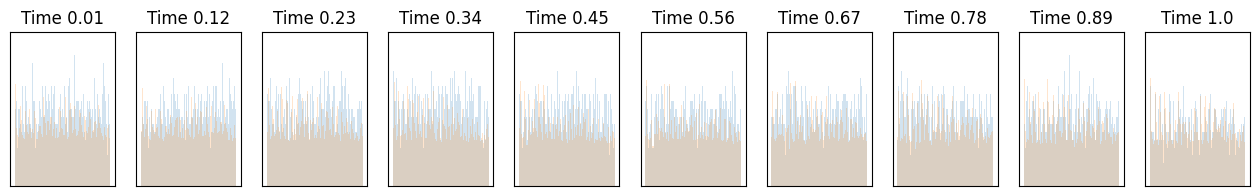

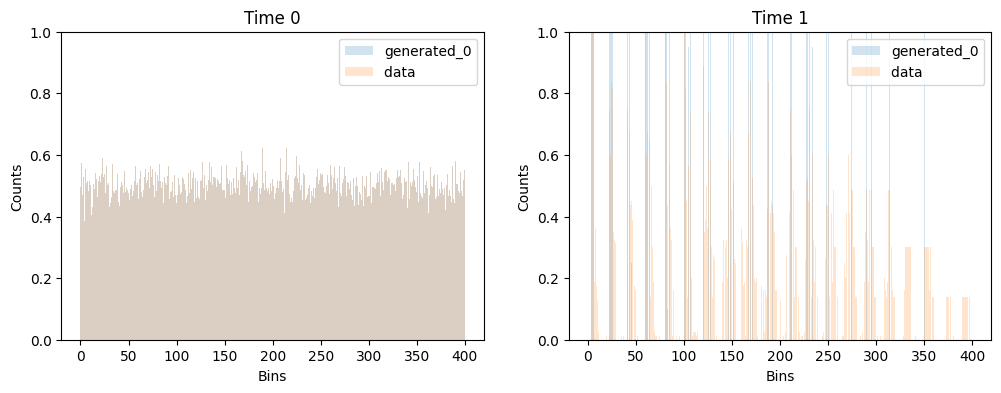

In [2]:
run_experiment(full_adjacency=True)

In [11]:

import torch
import torch_geometric
from torch_geometric.utils import dense_to_sparse

Adj = torch.tensor([[0., 1., 0., 1.],
                    [1., 0., 1., 0.],
                    [0., 1., 0., 0.],
                    [1., 0., 0., 0.]])


edge, _ = dense_to_sparse(Adj)

edge.t()

tensor([[0, 1],
        [0, 3],
        [1, 0],
        [1, 2],
        [2, 1],
        [3, 0]])

In [8]:

Adj.sum(dim=1).unsqueeze(-1)

tensor([[2.],
        [2.],
        [1.],
        [1.]])

In [26]:
from torch_geometric.data import Data

data = Data(x=Adj.sum(dim=1).unsqueeze(-1), edge_index=edge)


In [29]:
data.edge_index

tensor([[0, 0, 1, 1, 2, 3],
        [1, 3, 0, 2, 1, 0]])

In [30]:
from platform import node

time = torch.randn(32, 8)
node_feat = torch.randn(32, 20).unsqueeze(-1)
time = time.unsqueeze(1).repeat(1, node_feat.shape[1], 1)

print(node_feat.shape, time.shape)
torch.concat([node_feat, time], dim=-1).shape

torch.Size([32, 20, 1]) torch.Size([32, 20, 8])


torch.Size([32, 20, 9])

In [19]:
time.unsqueeze(1).repeat(1, x.shape[1], 1).shape 

torch.Size([32, 20, 16])

In [31]:
time

tensor([[[ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01],
         [ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01],
         [ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01],
         ...,
         [ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01],
         [ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01],
         [ 2.1054e-01, -1.4085e+00, -2.2384e-04,  ..., -7.0415e-01,
          -8.9481e-01, -7.4425e-01]],

        [[-4.5468e-01, -1.7376e-01, -5.6018e-01,  ...,  1.5968e+00,
           1.1470e+00, -1.0156e+00],
         [-4.5468e-01, -1.7376e-01, -5.6018e-01,  ...,  1.5968e+00,
           1.1470e+00, -1.0156e+00],
         [-4.5468e-01, -1.7376e-01, -5.6018e-01,  ...,  1.5968e+00,
           1.1470e+00, -1.0156e+00],
         ...,
         [-4.5468e-01, -1